In [154]:
#Load iris dataset into 
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [155]:
df.species.unique()

array([0, 1, 2])

In [156]:
df["species"].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [157]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

## Histogram
The histogram is to visualize the shape of the distribution. In this case, we show the distribution for the variables that are in cm. We can see that the sepal width follows a normal distribution around 3.

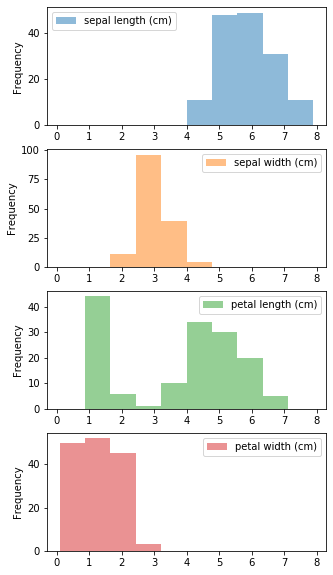

In [158]:
df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].plot.hist(alpha=0.5, subplots=True, sharex=False, sharey=False, figsize=(5,10))
plt.show()

## Pie chart
A pie chart has a circular shape, which shows the numerical proportion for each value.

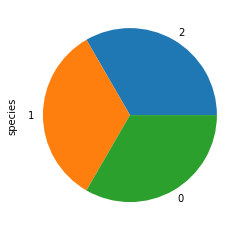

In [159]:
df.species.value_counts().plot.pie()
plt.show()

## Scatter plot
Scatter plots are for comparison between two variables. In this example, we compare the variables sepal lenght and petal lenght. We can see from the graph that there is a linear relationship between the variables. As the sepal lenght increases, the sepal lenght increases. 

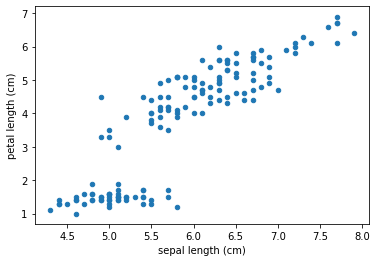

In [160]:
df.plot.scatter(x='sepal length (cm)', y='petal length (cm)')
plt.show()

### Color points by class
Coloring data points by the "species" column, we can see that the datapoints are grouped by each class. Therefore, we can conclude that species labeled as "0", has small petal lenght and small sepal length. Species "1" are in the middle and species "2" have larger lenght. 

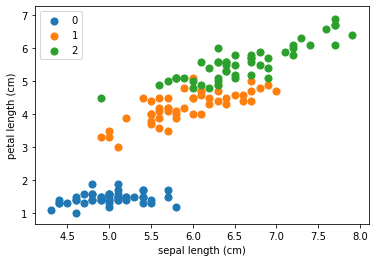

In [219]:
import numpy as np
def color_scatter_plot(ax, colcat, df, col1, col2):
    categories = np.unique(df[colcat].unique()) 
    for c in categories:
        df_aux = df[df[colcat]==c].copy()
        ax.scatter(df_aux[col1], df_aux[col2], label=c, s=50)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.legend()
    return ax
fig, ax = plt.subplots()
ax = color_scatter_plot(ax=ax, colcat='species', df=df, col1='sepal length (cm)', col2='petal length (cm)')
plt.show()

In [182]:
categories

array([0, 1, 2])

In [183]:
colordict

{0: array([0.61960784, 0.00392157, 0.25882353, 1.        ]),
 1: array([0.99807766, 0.99923106, 0.74602076, 1.        ]),
 2: array([0.36862745, 0.30980392, 0.63529412, 1.        ])}

## Scatterplot matrix
Scatterplot matrix: It is a square and symetric grid of several scatterplots. It has rows and columns, each one corresponding to a variable. Each quadrant shows a scatterplot for variables x and y of the grid. For the diagonal cells it shows the distribution of the variable. 

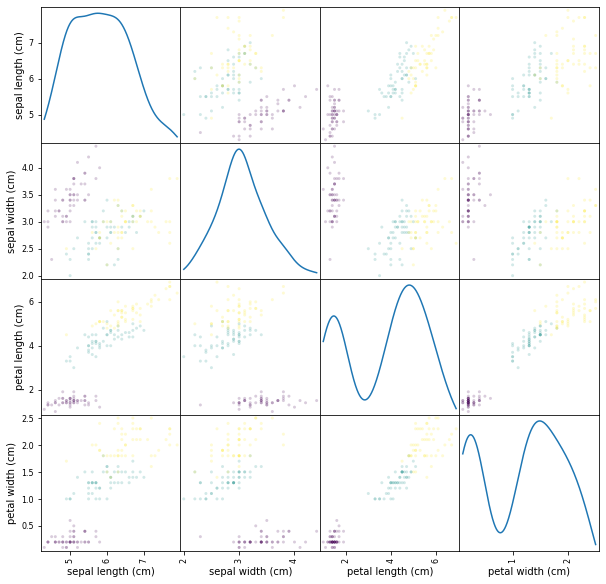

In [184]:
pd.plotting.scatter_matrix(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']], figsize  = [10, 10], diagonal='kde', c=df.species, alpha=0.2)
plt.show()

## Correlation matrix
A correlation matrix shows the relationship between the variables by a table, where each cell (i,j) corresponds to the value of the correlation between the variables i and j. The correlation is a value between -1 and 1 that represents the relationship between the variables. 
The graph of the example is a heatmap, which is a graphical representation of the correlation matrix, where the values of the correlation are represented with colors. 


In [185]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


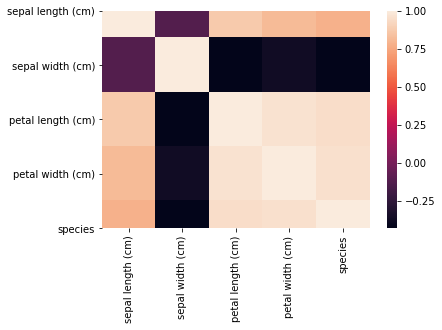

In [186]:
import seaborn as sn
sn.heatmap(df.corr(), annot=False)
plt.show()

## Boxplot

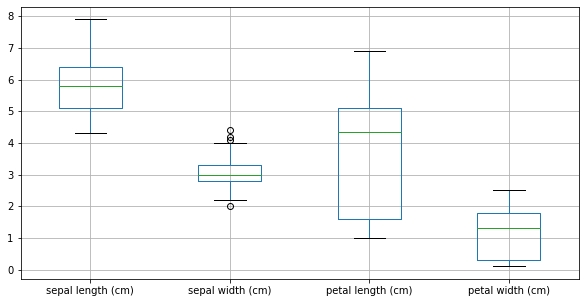

In [187]:
df.boxplot(column=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], figsize  = [10, 5])
plt.show()

## Outlier detection
If we analyze the boxplot for sepal with, we can see that there are some outliers when it is larger than 4, and there is one outlier when it is around 2. 

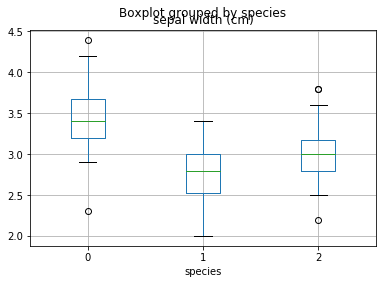

In [188]:
a = df.boxplot(column='sepal width (cm)', by='species')
plt.show()

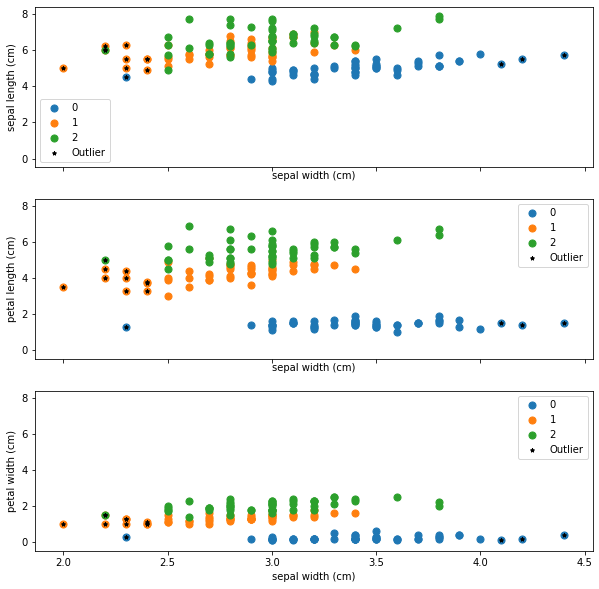

In [241]:
fig, axs = plt.subplots(3, 1, figsize=(10,10), sharex=True, sharey=True)
df_aux = df.copy()
df_aux['outlier'] = df_aux['sepal width (cm)'].apply(lambda x: 1 if (x > 4 or x<2.5) else 0)
df_aux = df_aux[df_aux['outlier']==1]

def color_dots_condition(ax, col, value, df, col1, col2, label):
    df_aux = df[df[col]==value].copy()
    ax.scatter(df_aux[col1], df_aux[col2], label=label, c='black', s=15, marker='*')
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.legend()
    return ax

axs[0] = color_scatter_plot(ax=axs[0], colcat='species', df=df, col1='sepal width (cm)', col2='sepal length (cm)')
axs[1] = color_scatter_plot(ax=axs[1], colcat='species', df=df, col1='sepal width (cm)', col2='petal length (cm)')
axs[2] = color_scatter_plot(ax=axs[2], colcat='species', df=df, col1='sepal width (cm)', col2='petal width (cm)')

axs[0] = color_dots_condition(ax=axs[0], col='outlier', value=1, df=df_aux, col1='sepal width (cm)', col2='sepal length (cm)', label='Outlier')
axs[1] = color_dots_condition(ax=axs[1], col='outlier', value=1, df=df_aux, col1='sepal width (cm)', col2='petal length (cm)', label='Outlier')
axs[2] = color_dots_condition(ax=axs[2], col='outlier', value=1, df=df_aux, col1='sepal width (cm)', col2='petal width (cm)', label='Outlier')


plt.show()